In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


1. Number of papers - yearwise

/tmp/ipykernel_3591992/4144366351.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(minor_tick_labels, minor=True)  # Minor tick labels


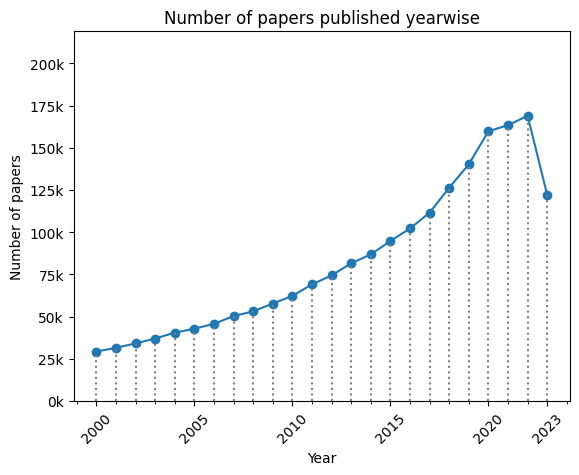

In [23]:
import os
base_path = '/mnt/NAS/patidarritesh/preprocess_2'
paper_count_dict = {}

# Count the files in the subdireectories
for year in range(24):
        year_new = 2000+year
        year = str(year)
        sum = 0
        for month in sorted(os.listdir(os.path.join(base_path, year))):
            root = os.path.join(base_path, year, month)
            files = os.listdir(root)
            sum+=len(files)
        # print(year, len(files))
        paper_count_dict[year_new] = sum

years = ['', '2000', '2005', '2010', '2015', '2020', '2023']
fig, ax = plt.subplots()
ax.plot(list(paper_count_dict.keys()), list(paper_count_dict.values()), marker='o')
major_ticks = [2000, 2005, 2010, 2015, 2020, 2023]
ax.xaxis.set_major_locator(ticker.FixedLocator(major_ticks))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
# Define major tick labels
major_tick_labels = ['2000', '2005', '2010', '2015', '2020', '2023']
# Define minor tick labels (empty for this example)
minor_tick_labels = [''] * len(major_ticks)  

# Set major and minor tick labels
ax.set_xticklabels(major_tick_labels, rotation=45, fontsize=10)  # Major tick labels
ax.set_xticklabels(minor_tick_labels, minor=True)  # Minor tick labels

for year, count in paper_count_dict.items():
    ax.vlines(year, 0, count, linestyles='dotted', colors='gray')

# Create a list of 8 evenly spaced y-axis tick values within the data range
y_ticks = np.linspace(0, 200000, 9)

# Set y-axis ticks and labels
ax.set_yticks(y_ticks)
ax.set_yticklabels([f'{tick/1000:.0f}k' for tick in y_ticks])

# Set y-axis bottom limit to 0
ax.set_ylim(0, max(paper_count_dict.values())+50000)

plt.xlabel('Year')
plt.ylabel('Number of papers')
plt.title('Number of papers published yearwise')
plt.show()

# save the plot with appropriate name
fig.savefig('/mnt/NAS/patidarritesh/PDF_2_LaTeX/Experiments/plots/papers_yearwise.png')

Token-count of latex stats


Papers/token-range

Token-count statistics table

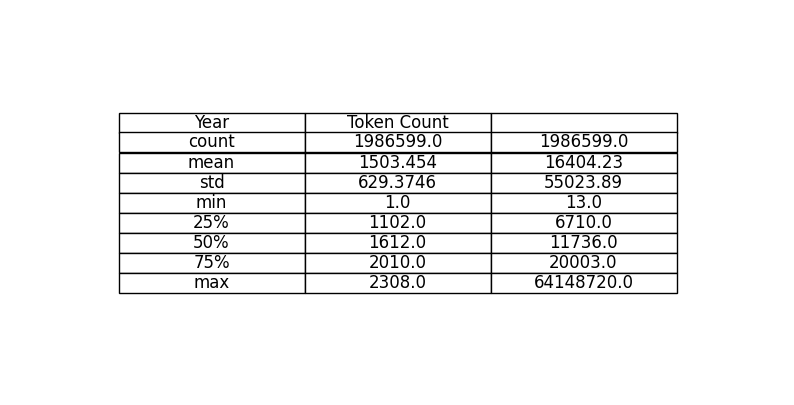

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the provided data
data = {
    'Year': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
    'Token Count': [1.986599e+06, 1.503454e+03, 6.293746e+02, 1.000000e+00, 
                    1.102000e+03, 1.612000e+03, 2.010000e+03, 2.308000e+03],
    '': [1.986599e+06, 1.640423e+04, 5.502389e+04, 1.300000e+01, 
         6.710000e+03, 1.173600e+04, 2.000300e+04, 6.414872e+07]
}
df = pd.DataFrame(data)

# Plotting the table
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('tight')
ax.axis('off')

# Creating the table
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colWidths=[0.2, 0.2, 0.2])

# Styling the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Save the plot as an image
plt.savefig('table_image.png', bbox_inches='tight')

# Show the table image
plt.show()


number of tokens in papers from each year

pdf page count yearwise, table and plot

In [3]:
from pdf2image import convert_from_path
from PIL import Image

def get_first_page_as_image(input_pdf):
    # Convert PDF to a list of PIL images
    images = convert_from_path(input_pdf, first_page=0, last_page=1)
    if images:
        return images[0]  # Return the first page as a PIL image
    else:
        raise Exception("Failed to convert PDF to image")

# Example usage
input_pdf = '/mnt/NAS/patidarritesh/PDF_2_LaTeX/Experiments/2103.14030v2.pdf'
first_page_image = get_first_page_as_image(input_pdf)

# To display the image (optional)
first_page_image.show()

# To save the image (optional)
first_page_image.save('first_page.png', 'PNG')


Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


In [4]:
# opena  aimage and change its size to 224*224 pixels
img = Image.open('first_page.png')
img = img.resize((224, 224))
img.save('first_page_resized.png')


In [6]:
# opena  aimage and change its size to 224*224 pixels
img = Image.open('first_page.png')
img = img.resize((672, 896))
img.save('first_page_896_672.png')


0     0107911
1     0516235
2     0478984
3     0336127
4     0231984
5     0159882
6     0109895
7      070501
8      046015
9      030319
10     020465
11     013953
12      09901
13      06927
14      05072
15      03754
16      03035
17      02213
18      01795
19      01506
20     011118
21      02351
22       0488
23       0174
24        073
25        018
26        028
27        012
28         07
29        022
30         03
31         02
32         01
Name: Frequency, dtype: object

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file and detect encoding
file_path = '/mnt/NAS/patidarritesh/PDF_2_LaTeX/Experiments/plots/page_count.csv'
data = pd.read_excel(file_path)



In [75]:
data.head()

,Class,Frequency
0,0,107911
1,5,516235
2,10,478984
3,15,336127
4,20,231984


In [89]:
lst = data['Class'].to_list()

In [90]:
lst

[0,
 5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 2000,
 3000,
 4000]

In [91]:
lst = lst[1:]

In [93]:
# ad element to the beginning of list
lst.append(5000)

In [94]:
data['Class'] = lst

In [95]:
y_values = data['Frequency'].to_list()
x_values = data['Class'].to_list()
len(y_values), len(x_values)

(33, 33)

In [96]:
data

,Class,Frequency
0,5,107911
1,10,516235
2,15,478984
3,20,336127
4,25,231984
5,30,159882
6,35,109895
7,40,70501
8,45,46015
9,50,30319


In [100]:
for i in range(len(lst)):
    lst[i] = str(lst[i])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


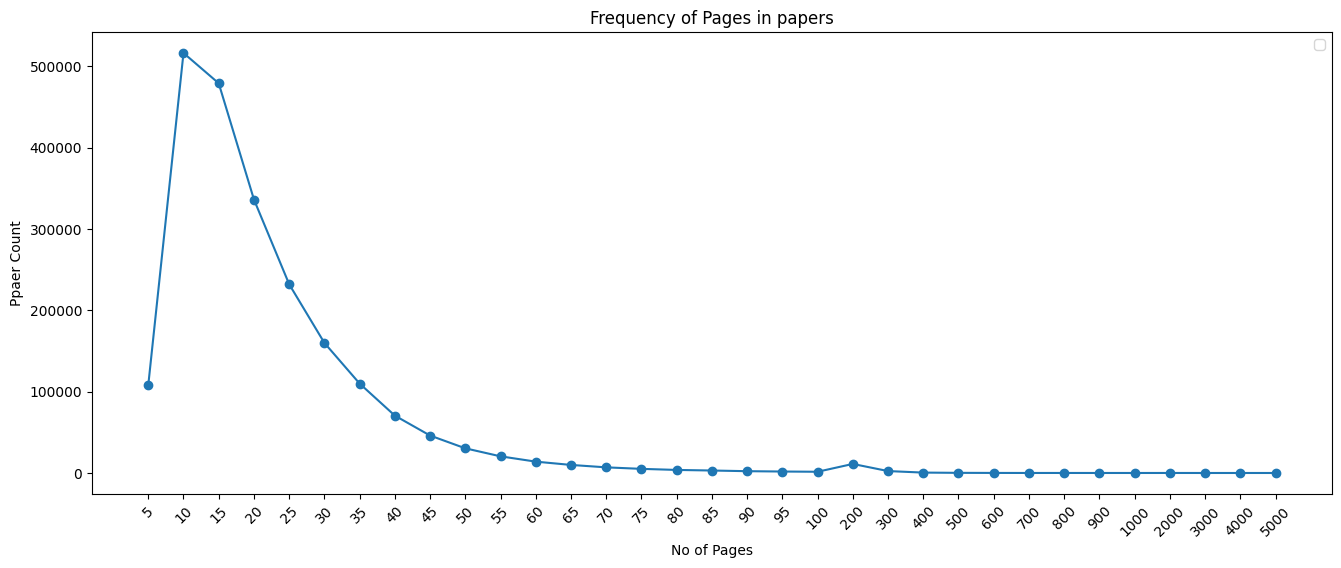

In [105]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 6))  # Adjust the width and height as needed

# Adding labels and title
plt.xlabel('No of Pages')
plt.ylabel('Ppaer Count')
plt.title('Frequency of Pages in papers')

plt.xticks(x_values, rotation=45, fontsize=10)  # Rotate the x-axis labels

# Adding legend
plt.legend()
plt.plot(y_values, label='Line 1',  marker='o')
plt.xticks(range(len(lst)), lst)

# Displaying the plot
plt.show()




# save the plot with appropriate name
# fig.savefig('/mnt/NAS/patidarritesh/PDF_2_LaTeX/Experiments/plots/papers_yearwise.png')